<a href="https://colab.research.google.com/github/brandhawa99/pytorchTest/blob/main/01PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3:"fitting the model to data(traingin)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }




In [2]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(traingin)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's building block for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.1.0+cu118'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a gmae of two parts
1. Get data intoa numberical representation.
2. Build a model to learn pattersn in teh numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**


In [4]:
# Create *known* paramaters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step  = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with out data.

In [6]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visulaize out data?
This is where the data exploerer's motto comes in!
"Visualize, visualize, visulaize!"

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g",s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  # show the legend
  plt.legend(prop={"size":14})

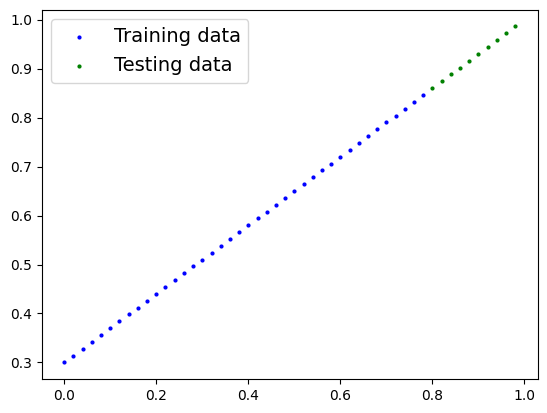

In [8]:
  plot_predictions()

### 2. Build model

Out first PyTroch Model
This is very exciting.... let's do it

What out model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Trhough two main algorithms:
1. Gradient descent
2. Backpropagation

In [9]:
from torch import nn
# Create a linear regresion model class
class  LinearRegressionModel(nn.Module): # <- almost everything in PyTroch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float32))
    # Foreward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <-"x" is the input data
    return self.weights * x + self.bias



### PyTorch model building essentials

* torhc.nn - contains all of the vbuilding blocks for computional graphs(a neural network can be considered a computational graph)
* torch.nn.Paramteres = what aprameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it,  you should overwire forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn>modules subclasses require youi to overwire forward(), this method defines what happens in the forward  computation


### Checkiing the contents of out PyTorch model
Now we've created a model, lets see what's inside...
So we can check out model parameters or what's inside our model using ```.parmeters().```

In [10]:
# Create a random seed
torch.manual_seed(42)
# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

 ### Making predicitons using `torch.inference_mode()`


TO check out model's predictive power, lets see how well it predicts `y_test` based on `X_test`.


When we pass data through out model, it's going to run it through the `foreward()` method



In [12]:
# Make predictions with model
with torch.inference_mode(): # With inference mode PyTorch keeps track  of less data (BTS)
  y_preds = model_0(X_test);

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode @ https://twitter.com/PyTorch/status/1437838231505096708?lang=en

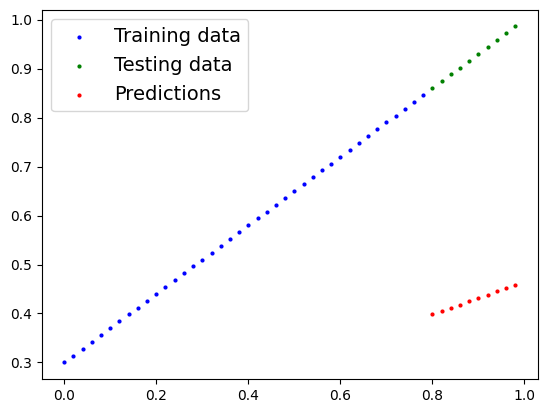

In [13]:

plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameter (these may be random) to some *known* paramaters

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or wrong your models predictions are is to use a loss function.

* Note : loss function may also be called cost function or criterion in different areas.

This we need to train:

* **Loss function:** A function to measure how wrong your model's predction are to the ideal outputs
* **Optimizer:** Takes into account the loss of a model and adjusts the mode'sl parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need
 * A training loop
 * A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Stepup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [17]:
loss_fn

L1Loss()

***Q:*** Which loss function and optimizer should i use?

***A:*** This will be problem specific. But with experience you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem(like ours), a loss function of `nn.L1Loss()` and and optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifiying whether a photo of a dog or cat, you'll likely want to use a loss function of `` nn.BCELoss() (binary corss entropy loss).

### Building a training loop (and a tsting loop) in PyTorch

A couple of things we need in a training loop:
0. Look through data and do...
1. Forward pass (this involves data moving through out model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Look backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation)
5. Optimizer step - user the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)



In [18]:

# An epoch is one loop th rough the data...(this is a hyperparamtere because we set it ourself)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them aboe in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval # turns off different settings in the model not needed for evaluation /testing (dropout/bvatch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    #Print out what's happenin'
    if epoch % 10 == 0 :
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Test: {loss} Test loss: {test_loss}")
      print(model_0.state_dict)


Epoch: 0 | Test: 0.31288138031959534 Test loss: 0.48106518387794495
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 10 | Test: 0.1976713240146637 Test loss: 0.3463551998138428
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 20 | Test: 0.08908725529909134 Test loss: 0.21729660034179688
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 30 | Test: 0.053148526698350906 Test loss: 0.14464017748832703
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 40 | Test: 0.04543796554207802 Test loss: 0.11360953003168106
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 50 | Test: 0.04167863354086876 Test loss: 0.09919948130846024
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 60 | Test: 0.03818932920694351 Test loss: 0.08886633068323135
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 70 | Test: 0.03476089984178543 Test loss: 0.0805937647819519
<bound method Module.state_dict

In [19]:
import numpy as np

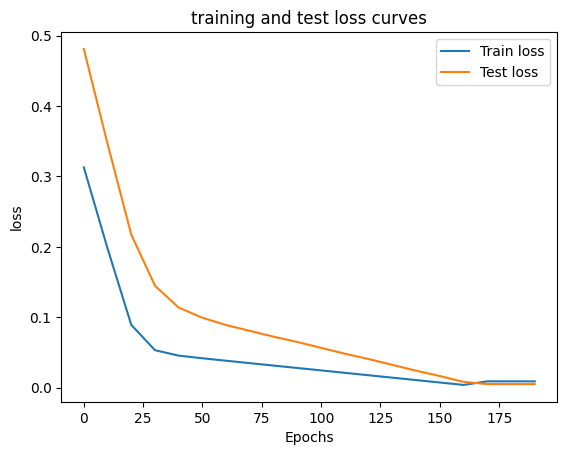

In [20]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) , label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

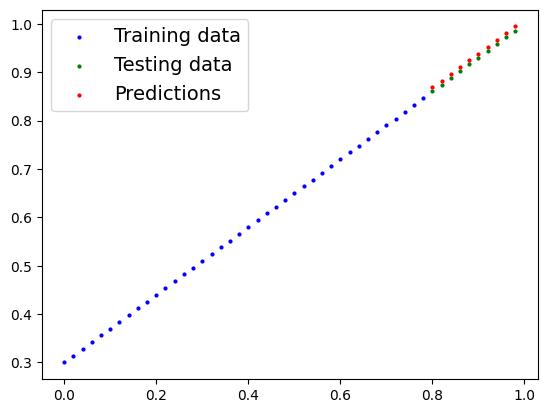

In [22]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are thre main methods you shoul dknow aobut for saving and loading models in PyTorch.
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

#

In [23]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model  state dict

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we save our model's `state_dict()` rather the entire model, we'll creat a new instance of our  model calss and looad the saved `state_dict()` into that

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# To load in saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
# Mkae some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [29]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above

In [30]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (For potentially faster computing).
If no GPU is available, the code will defuat to using CPU

In [31]:
# Step up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 DATA

In [32]:
# Create some data using the linear regression formula of y = weight * X + bias

In [33]:
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split data
training_split = int(0.8 * len(X));
X_train, y_train = X[:training_split], y[:training_split]
X_test , y_test = X[training_split:], y[training_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

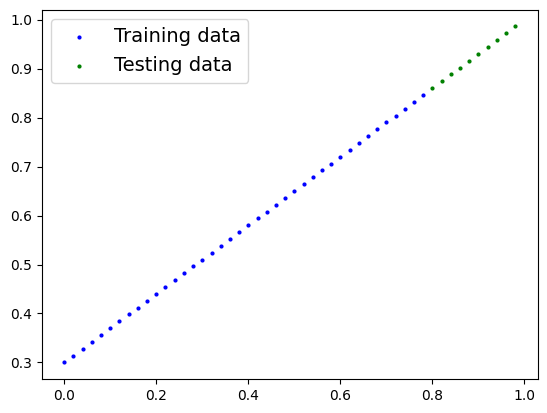

In [35]:
# Plot the data
# Note: if you don't have the plot_predictions() function loade, this will error
plot_predictions(X_train,y_train, X_test, y_test)

### 6.2 Buildig a PyTorch Linear Model

In [36]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters / also caleed: linear transform, probing layer, fully connecteed layer , dense layer
    self.linear_layer = nn.Linear(in_features =1,
                                  out_features=1)

  def forward(self, x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
# Set the model to use the target device


### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop



In [38]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01,)

In [39]:
#Let's write a testing loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  #1. FOrward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Pring out what's happening

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [40]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## 6.4 Making and evaluting predictions

In [41]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

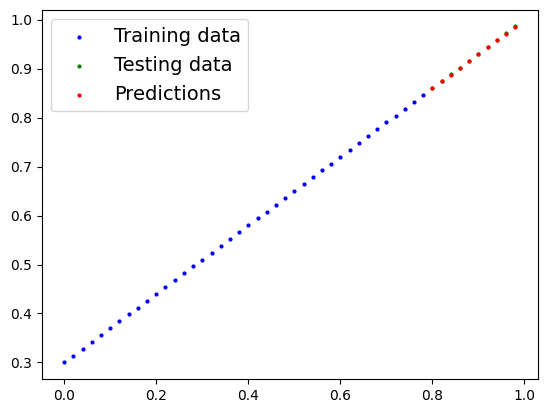

In [42]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and Loading a model

In [43]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_1.pth


In [44]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [45]:
# Load a Pytorch Model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [47]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [51]:
# Eval loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])